In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ
from qiskit.circuit.library import PhaseGate
from qiskit.extensions import HamiltonianGate
import qiskit_tools as qt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from qiskit.circuit.library import QFT

In [2]:
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
width=0.75
color='black'
fontsize=28
ticksize=22
figsize=(10,8)

In [3]:
nx = 1
nanc = 7

In [4]:
qreg = QuantumRegister(nx, 'x')
qanc = QuantumRegister(nanc, 'anc')
circ = QuantumCircuit(qreg, qanc)

In [5]:
theta = 1./3
phi = 1./8
t = 2.*np.pi
A = np.array([[phi,0],[0,theta]])
A_gate = HamiltonianGate(A, t)

In [6]:
circ.h(qreg[0]);
circ = qt.PhaseEst(circ, qreg, qanc, A_gate)

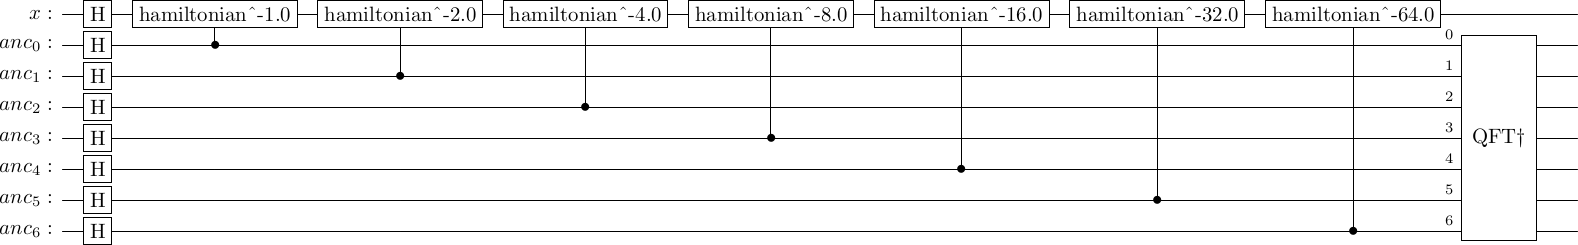

In [7]:
circ.draw('latex')

In [8]:
backend = Aer.get_backend('statevector_simulator')
job = execute(circ, backend)
result = job.result()
state_vector = np.asarray(result.get_statevector())

In [9]:
state_v = np.asarray(state_vector).reshape((2**nanc,2**nx)).T
state_v = np.sum(state_v, axis=0)
state_v = state_v/np.sqrt(np.sum(np.abs(state_v)**2))

In [10]:
xs = np.arange(2**nanc)/(2**nanc)

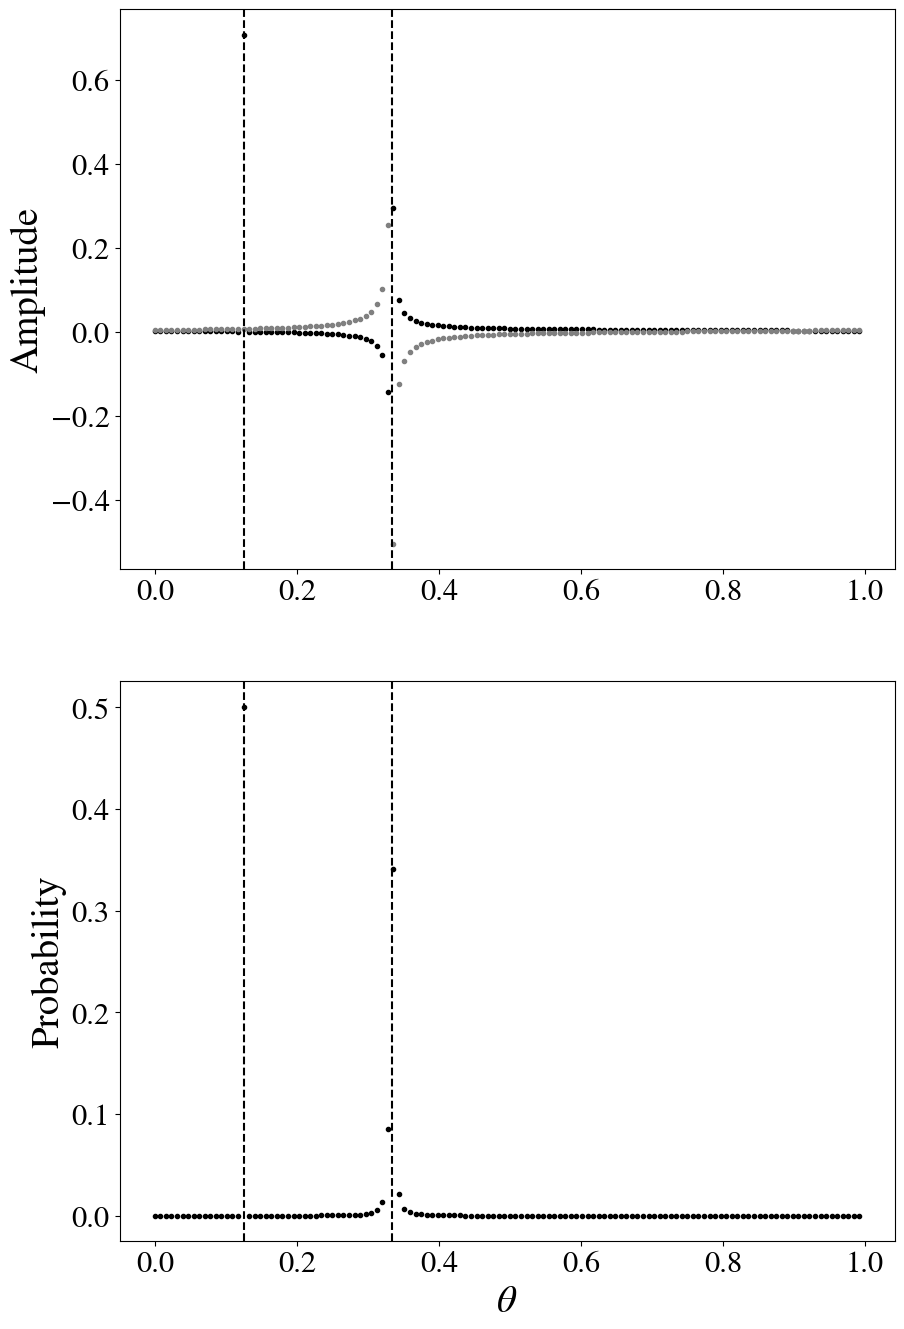

In [11]:
fig = plt.figure(figsize=np.array(figsize)*[1,2])
ax = fig.add_subplot(211)

plt.scatter(xs, state_v.real, marker='.', color='black')
plt.scatter(xs, state_v.imag, marker='.', color='grey')
ax.set_ylabel('Amplitude', fontsize=fontsize);
ax.tick_params(axis='both', labelsize=ticksize);

ax.axvline(theta, ls='--', color='black')
ax.axvline(phi, ls='--', color='black')

ax = fig.add_subplot(212)

plt.scatter(xs, np.abs(state_v)**2, marker='.', color='black')
ax.set_xlabel(r'$\theta$', fontsize=fontsize);
ax.set_ylabel('Probability', fontsize=fontsize);
ax.tick_params(axis='both', labelsize=ticksize);

ax.axvline(theta, ls='--', color='black')
ax.axvline(phi, ls='--', color='black')

plt.show()